# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import calplot
import requests
import plotly.express as px

In [2]:
# Load data
df_crimes = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

# Create a datetime column
df_crimes['datetime'] = pd.to_datetime(df_crimes['Date'] + ' ' + df_crimes['Time'])

# Drop year 2018 (it's incomplete)
df_crimes = df_crimes[df_crimes['datetime'].dt.year != 2018]

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).
* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

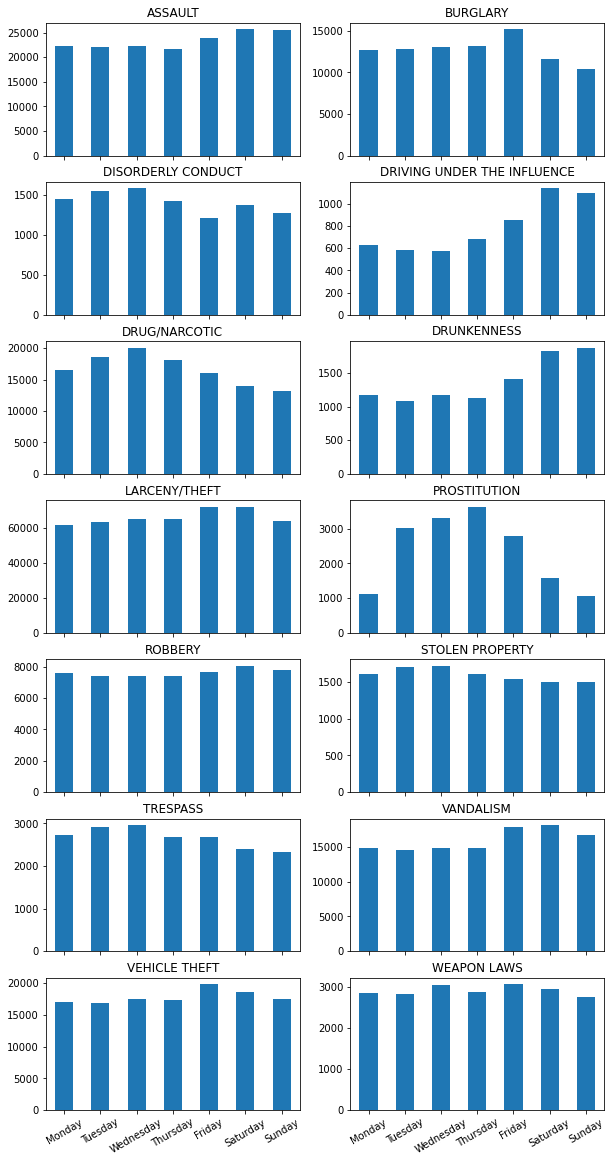

In [8]:
# Week-day plots

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axs = plt.subplots(7,2, sharex=True, figsize=(10,20))

for idx, i in enumerate(sorted(focuscrimes)):
    df_temp = df_crimes[df_crimes.Category == i]
    df_day = df_temp.DayOfWeek.value_counts().reindex(days)
    df_day.plot.bar(ax = axs[int(idx/2), idx%2], title=i,rot=30)

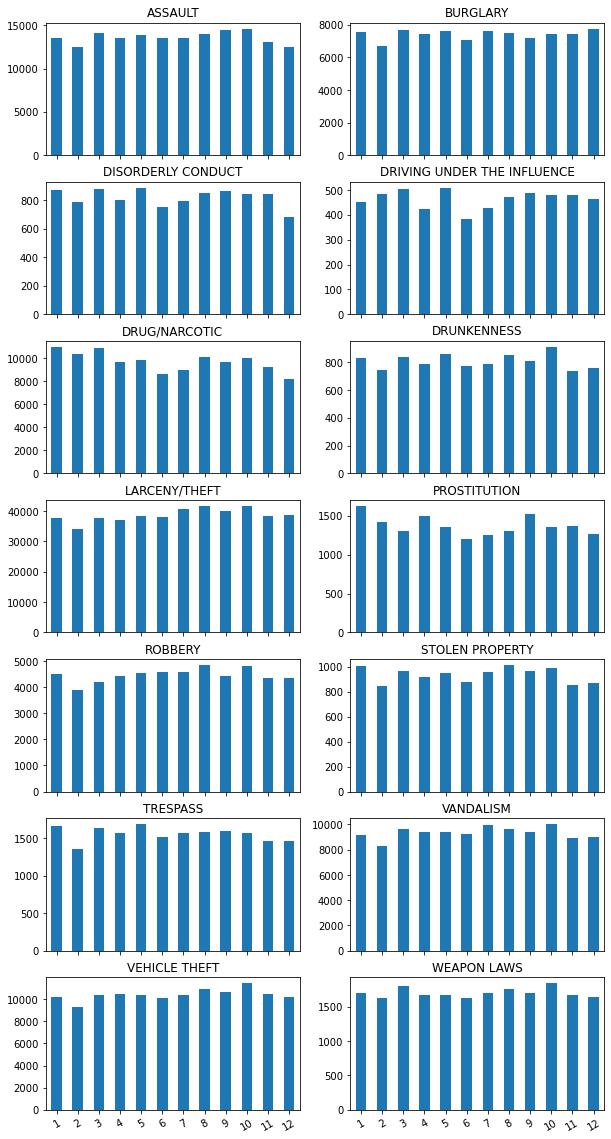

In [9]:
# Months plots

months = np.arange(1,13)
fig, axs = plt.subplots(7,2, sharex=True, figsize=(10,20))

for idx, i in enumerate(sorted(focuscrimes)):
    df_temp = df_crimes[df_crimes.Category == i]
    df_month = df_temp.datetime.dt.month.value_counts().reindex(months)
    df_month.plot.bar(ax = axs[int(idx/2), idx%2], title=i,rot=30)

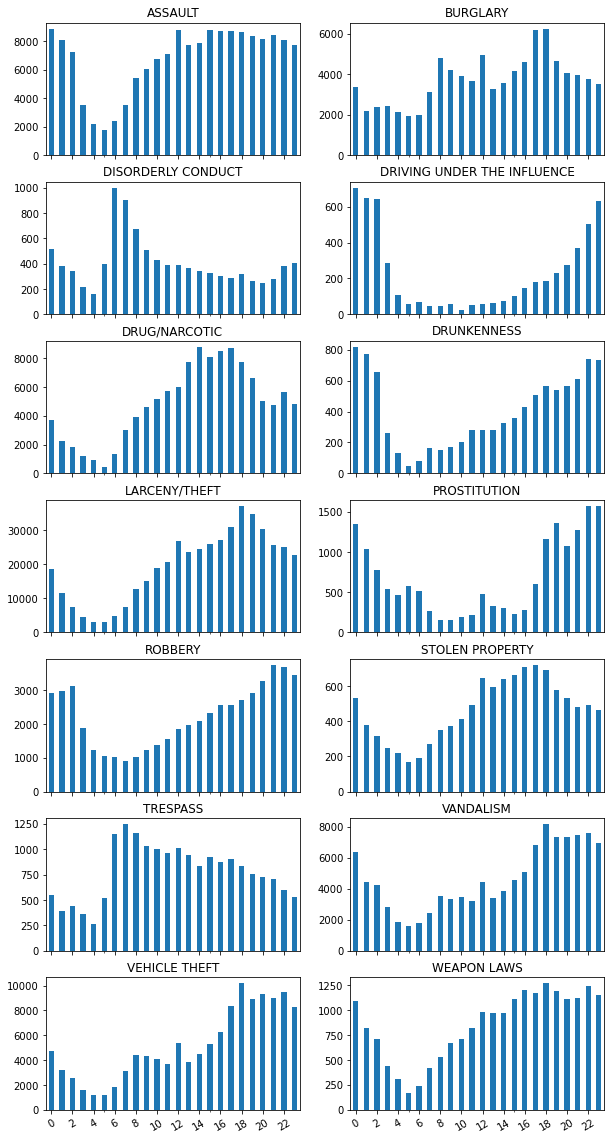

In [35]:
# 24-hour cycle

hours = np.arange(24)
fig, axs = plt.subplots(7,2, sharex=True, figsize=(10,20))

for idx, i in enumerate(sorted(focuscrimes)):
    df_temp = df_crimes[df_crimes.Category == i]
    # Calculate the number of crimes for each hour of the week, and reindex the result to include all 168 hours
    df_hour = df_temp.datetime.dt.hour.value_counts().reindex(hours) 
    # Set the x-tick labels to be the hours that are divisible by 12
    xticks=[i for i in df_hour.index if i% 2 == 0] 
    df_hour.plot.bar(ax = axs[int(idx/2), idx%2], title=i,rot=30,xticks=xticks)

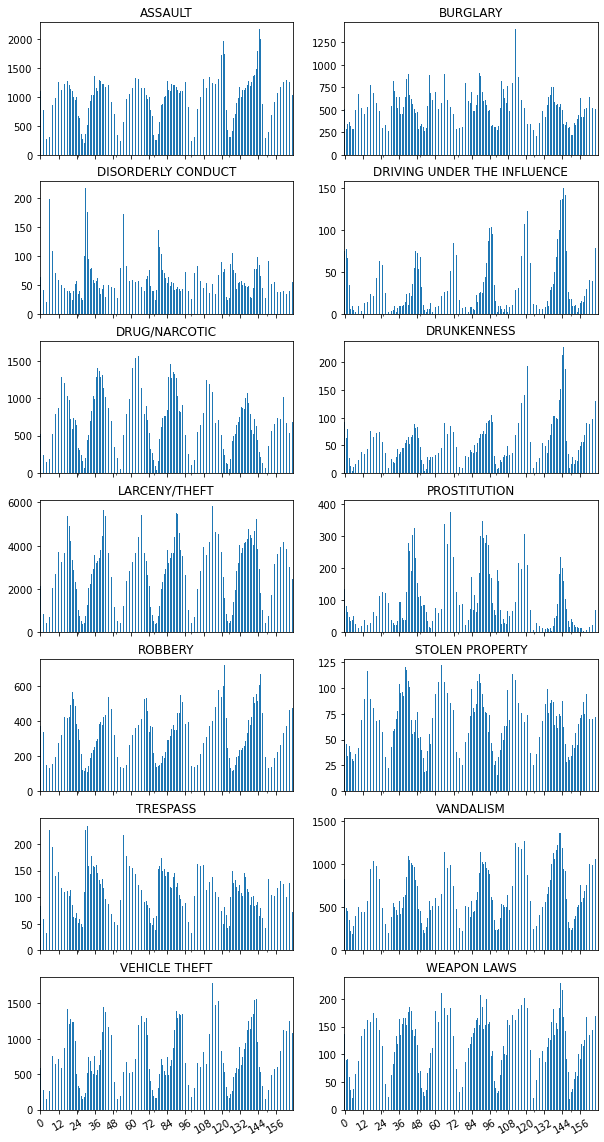

In [36]:
# 168-hour plot

# Add column HourOfWeek which starts at 0 (Monday 0:00) and goes to 167 (Sunday 23:00)
dayToHour = {'Monday':0, 'Tuesday':24, 'Wednesday':48, 'Thursday':72, 'Friday':96, 'Saturday':120, 'Sunday':144}
df_crimes['HourOfWeek'] = df_crimes['DayOfWeek'].replace(dayToHour) + df_crimes['datetime'].dt.hour

week_hours = np.arange(168)
fig, axs = plt.subplots(7,2, sharex=True, figsize=(10,20))

for idx, i in enumerate(sorted(focuscrimes)):
    df_temp = df_crimes[df_crimes.Category == i]
    df_hour = df_temp.HourOfWeek.value_counts().reindex(week_hours)
    xticks=[i for i in df_hour.index if i% 12 == 0]
    df_hour.plot.bar(ax = axs[int(idx/2), idx%2], title=i,rot=30,xticks=xticks)

Days with no crimes: DatetimeIndex(['2007-12-16', '2008-08-01', '2009-06-10', '2017-01-26',
               '2017-08-22', '2017-08-27'],
              dtype='datetime64[ns]', freq=None)


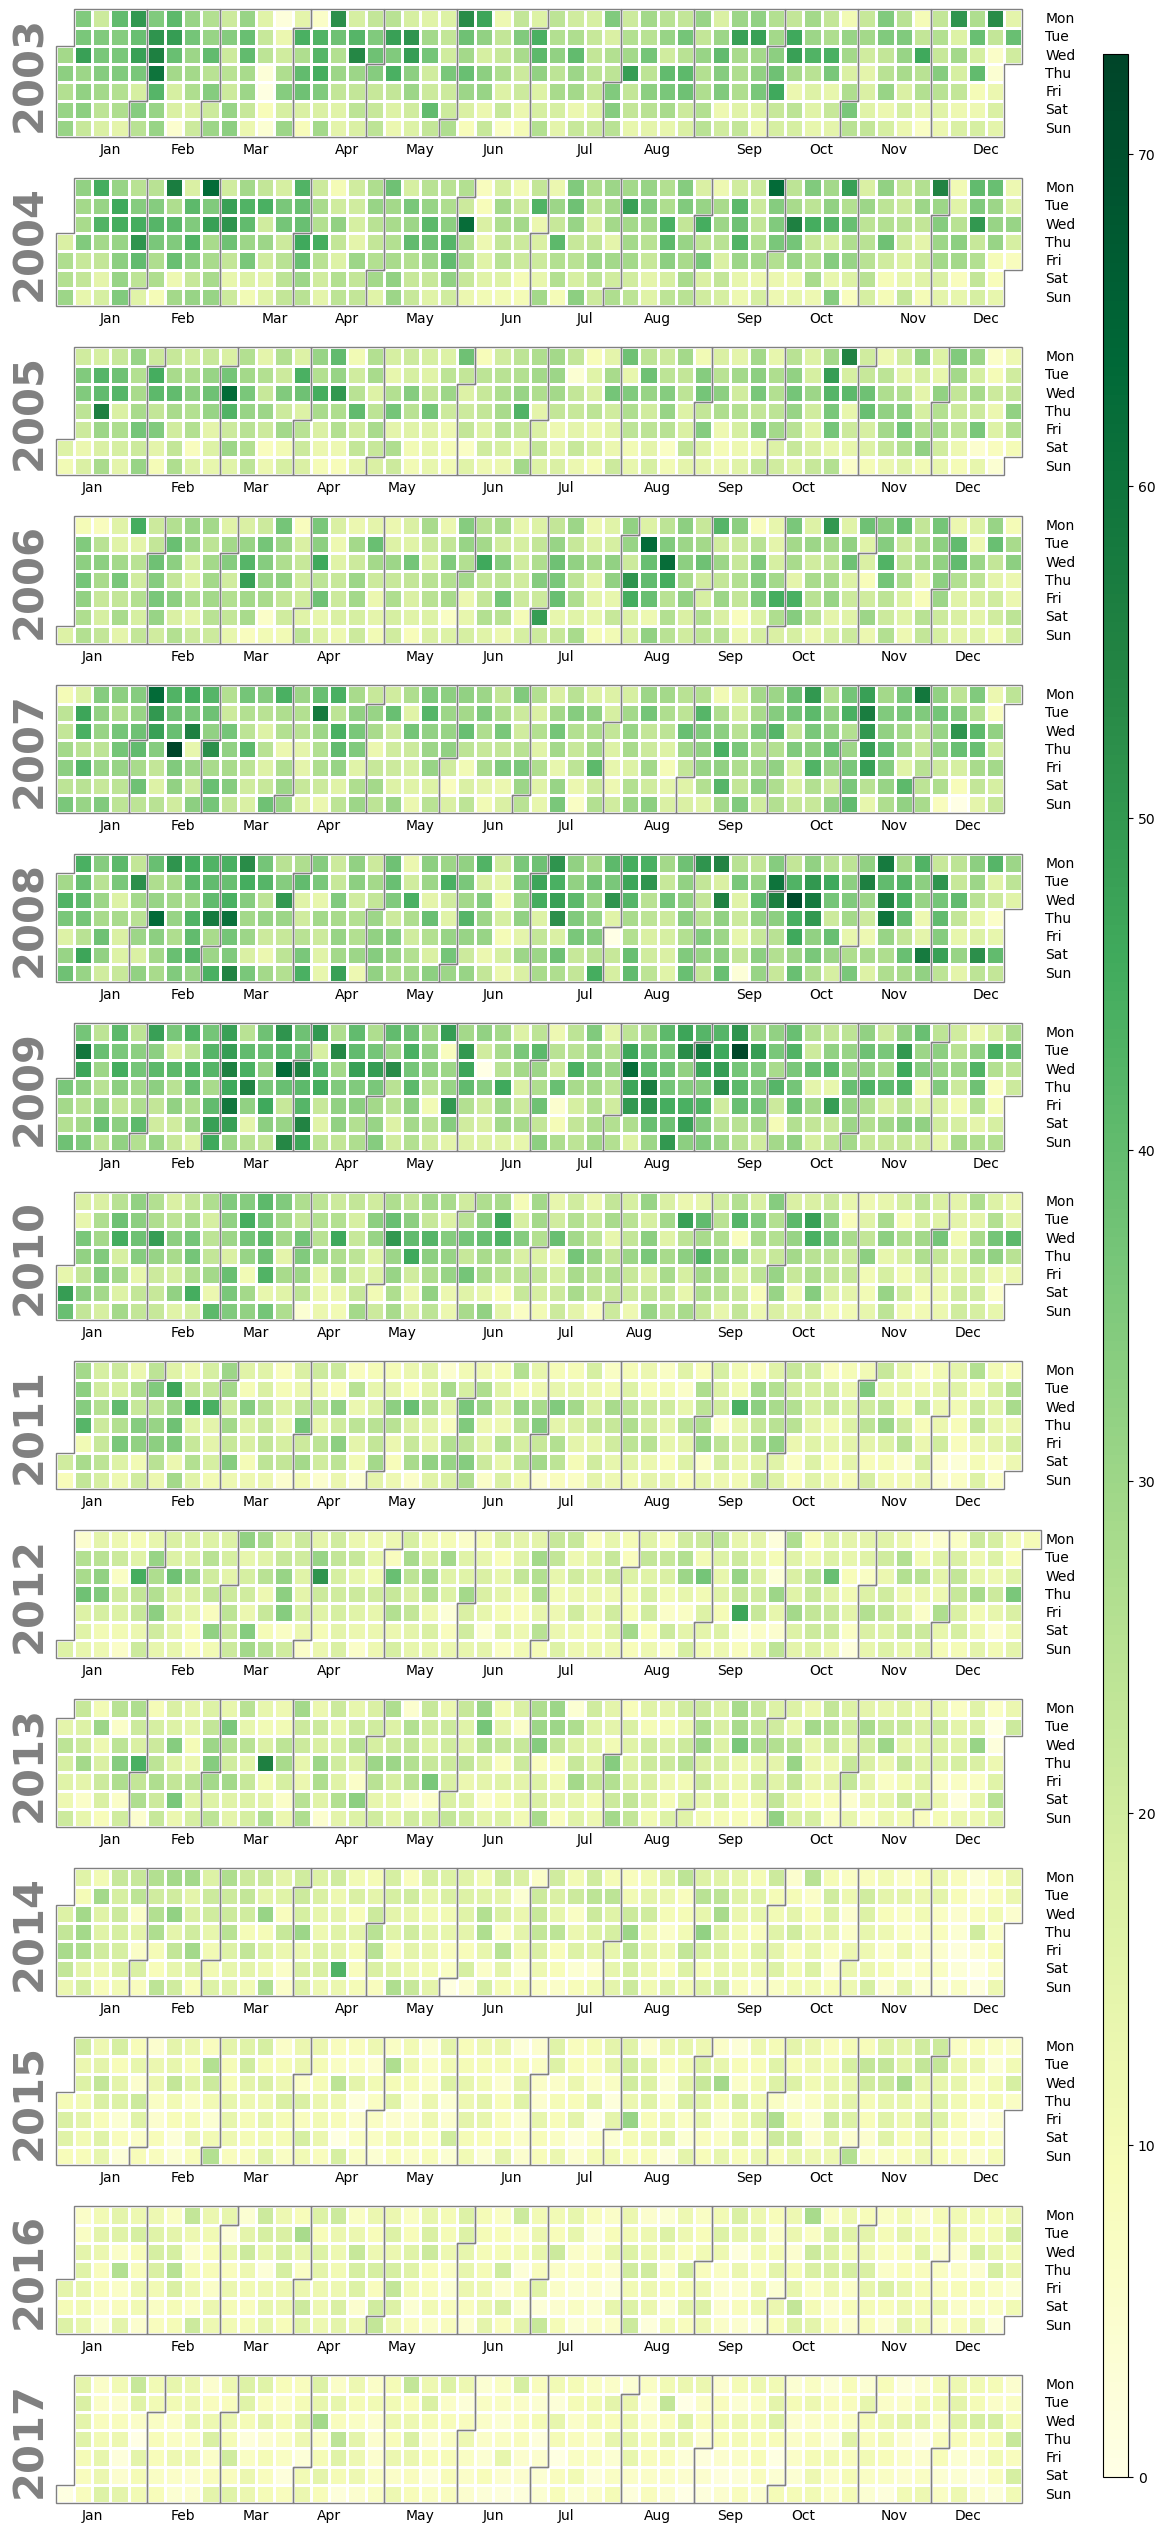

In [33]:
# Get only drug crimes
df_drug = df_crimes[df_crimes.Category == 'DRUG/NARCOTIC']

# Create a date_range of all the elements
my_range = pd.date_range(start="2003-01-01", end="2017-12-31", freq='D')

# Drop dates where no crime occurs
empty_days = my_range.difference(sorted(df_drug.datetime.dt.date.unique()))
print("Days with no crimes:", empty_days)
my_range = my_range.drop(empty_days)

# Make a pandas series of the drug crime counts for each date
counts = np.array(df_drug.datetime.dt.date.value_counts().sort_index())
events = pd.Series(counts, index=my_range)

# Plot
calplot.calplot(events, cmap='YlGn');

We can see a clear trend in the decrease of narcotic crimes related as we go further away in time, which is quite shocking for us as we would have thought these crimes were instead on the rise!

In [40]:
df_crimes

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,datetime,HourOfWeek
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-11-22 17:50:00,17
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-10-18 20:00:00,44
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-15 02:00:00,146
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0,2011-02-18 05:27:00,101
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0,2010-11-21 17:00:00,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129520,17050730416710,170507304,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Thursday,06/22/2017,01:42,CENTRAL,"ARREST, CITED",...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,77.0,2017-06-22 01:42:00,73
2129521,17071435504014,170714355,4014,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,09/01/2017,17:00,PARK,NONE,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,112.0,2017-09-01 17:00:00,113
2129522,17053348465010,170533484,65010,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Friday,06/30/2017,17:50,BAYVIEW,"ARREST, BOOKED",...,22.0,NaN,1.0,NaN,NaN,NaN,NaN,56.0,2017-06-30 17:50:00,113
2129523,17102776330130,171027763,30130,OTHER OFFENSES,PEDDLING WITHOUT A LICENSE,Wednesday,12/20/2017,15:41,SOUTHERN,"ARREST, BOOKED",...,3.0,7.0,2.0,1.0,1.0,1.0,35.0,21.0,2017-12-20 15:41:00,63


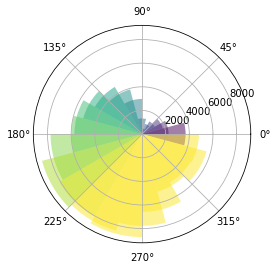

In [64]:
#24 Hours polar plot
# Get Drug/Narcotic crimes
df_drugs = df_crimes[df_crimes.Category == 'DRUG/NARCOTIC']

#Set range of 24 
hours = np.arange(24)

#Save colors
colors = plt.cm.viridis(hours / 16)

# Compute pie slices
N = 24 #Bar num

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = np.pi / 6

# Get number of robberies for each hour
num_drugs = df_drugs.datetime.dt.hour.value_counts().reindex(hours)

# Plot
ax = plt.subplot(projection='polar')
ax.bar(theta, num_drugs, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

## A1 Part 2: Dataviz questions 

Have a look at the encoding dataviz lecture (Week 4), then answer the following questions in your own words. 

* Mention 10 examples of ways we can encode data.
* Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
* Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
* Explain in your own words: What is the problem with pie-charts?

* Examples:
1. Length of a rectangle when ploting numeric data values, that are represented by it.

2. Nodes and edges that represent values and their connection with each other respectively.

3. Coordenates X and Y are represent by encodings such as the position

4. Area to respresent data defined by area under a curve 

5. Color intensity

6. Angles 

7. Shape 

8. Volume 

9. Density

10. Lines

* Not all encodings are created equally. Because not all econdings serve the same purpose. While some encodings might be better to represent some data than others.

* Examples of 3 eencodings that are difficult to read:
1. Angles (extra example, Pie chart).
2. Areas
3. Color intensity. A heat map can be very difficult to read and interpret if the colors are nor very well defined and differentiated. 
4. Extra: Nodes and edges. Networks can be very difficult to read and interpret as well when they become very populated and not all nodes and edges can be identified clearly. 

* Pie charts are not a good representation of data because the quantity of categories you can add is very limited, the more the messier and difficult to understand the chart becomes. They can be misleading when comparing between each other, especially if the slizes are similar in size, as we are comparing by highest angle value, it can be hard, for example, to define what is the highest value-category. Something that in visualizations such as a barchart, it would be very easy to note as the bars representing the categories are aligned. Lastly, the use of this chart is very limited, for example, you cannot show time series.


## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples. 

In [66]:
link = "https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson"
f = requests.get(link)
Districts = f.json()

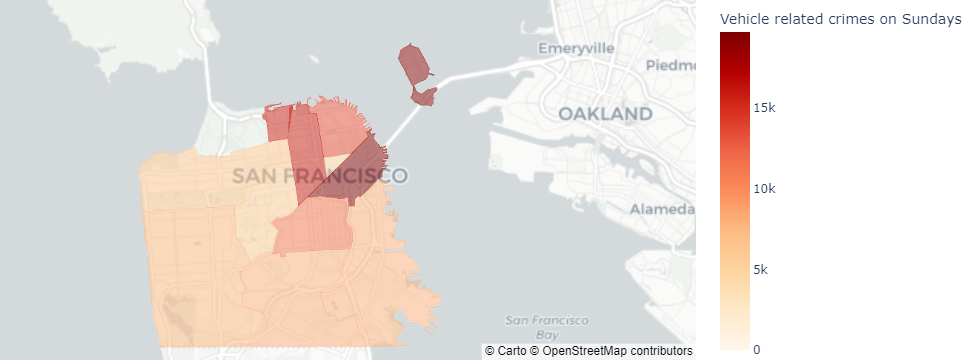

In [76]:
# Take only vehicle theft crimes on sundays
df_car = df_crimes[df_crimes.Category.isin(['VEHICLE THEFT','LARCENY/THEFT', 'VANDALISM', 'STOLEN PROPERTY'])]
df_car = df_car[df_car.DayOfWeek == 'Sunday']

# Make dictionary of number of vehicle thefts per district
sunday_vehicle_theft = dict(df_car.PdDistrict.value_counts())

# Convert to a DataFrame
df_car_district = pd.DataFrame(list(zip(list(sunday_vehicle_theft.keys()), list(sunday_vehicle_theft.values()))),
                       columns=['DISTRICT', 'unemp'])

# Plot
fig = px.choropleth_mapbox(df_car_district, geojson=Districts, locations='DISTRICT', color='unemp',
                           color_continuous_scale="orRd",
                           range_color=(0, max(sunday_vehicle_theft.values())),
                           mapbox_style="carto-positron",
                           zoom=10.4, 
                           center = {"lat": 37.77687, "lon": -122.40532},
                           opacity=0.5,
                           labels={'unemp':'Vehicle related crimes on Sundays'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(marker_line_width=0)
fig.show()

Best place to park your car on Sundays is in dictrict Tenderloin, and the worst place to park it is in district Ingleside

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* Find your own example of human noise in the data and visualize it.